# Week 8. Interactions between independent variables

### By Hyunsu Oh and Charlie Eaton

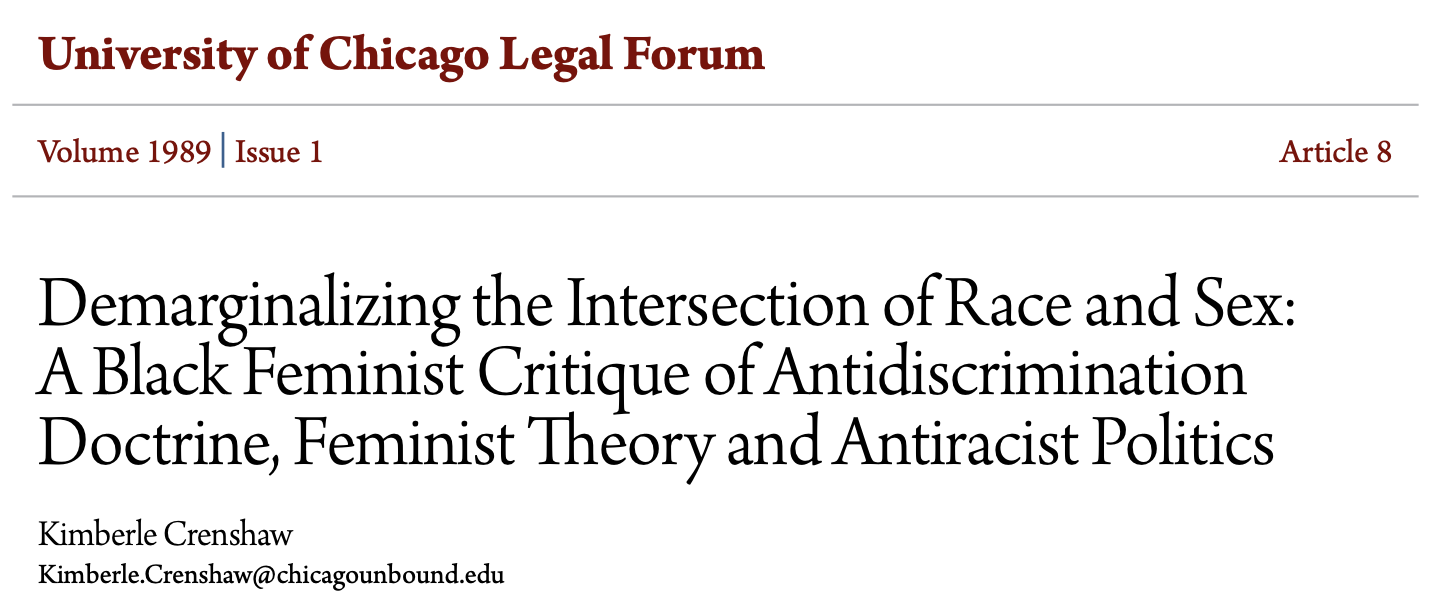

*“Black women can experience discrimination in ways that are both similar to and different from those experienced by white women and Black men. Black women sometimes experience discrimination in ways similar to white women's experiences; some times they share very similar experiences with Black men. Yet often they experience double-discrimination-the combined effects of practices which discriminate on the basis of race, and on the basis of sex. And sometimes, they experience discrimination as Black women-not the sum of race and sex discrimination, but as Black women.”*

http://www.openschooleast.org/wp-content/uploads/2019/07/Demarginalizing-the-Intersection-of-Race-and-Sex_-A-Black-Feminis.pdf

## 1. An example of interactions from the textbook:

Treiman definition: situations in which the effect of one variable (IV) on another (DV) is contingent on the value of a third variable (IV)

* which are the dependent (DV) and independent variables (IVs)?
* why does the DV have an interactive relationship to the IVs?

## Why the image below shows an interactive relationship: Education alone doesn't seem to increase support for legal abortion. It appears to be the combination of educational attainment AND religious belief which creates a relationship with the DV (legal abortion) 

<img src="abortioninteraction.jpeg" width="800" align="left">

3 types of interactive relationships:

* Nominal X Nominal

* Nominal X interval-ratio

* Interval-ratio X interval-ratio


## 2. Interactions involving nominal independent variables

    A. Develop a hypothesis about whether income (DV) is or is not interactively associated with race (IV) and sex (IV)
    
    B. State the direction of the associations you predict for EACH independent variable (IV)
    
    C. Our hypotheses are constrained by sex being measured only as male/female and race only being measured as white/black/other
    
    D. Use the code below to test your hypotheses visually

H1: Income will be less if a person is Black and female than if a person is anyone else...

### Hypothesizing exercise
H2: The difference in income between Black men and Black women will be less than the difference in income between white males and white females 
- Because Black women are gendered more as workers than white women who are gendered more as homemakesr 

H2 Hunter: The difference in income between Black men and Black women will be MORE than the difference in income between white males and white females  
- Because White men and White women both enjoy advantages that are comparable over those enjoyed by Black men and women



Set your graph format and install the 538 scheme

In [1]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [2]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


In [4]:
ssc install g538schemes
*capture log close
*log using w8lesson_interactionlog20200311.log
set more off
use realrinc age yearsjob educ race sex using "GSS2018w8", clear
gen age2=age^2
ds

checking g538schemes consistency and verifying not already installed...
installing into C:\Users\User\ado\plus\...
installation complete.
(7 missing values generated)
age       educ      sex       race      yearsjob  realrinc  age2


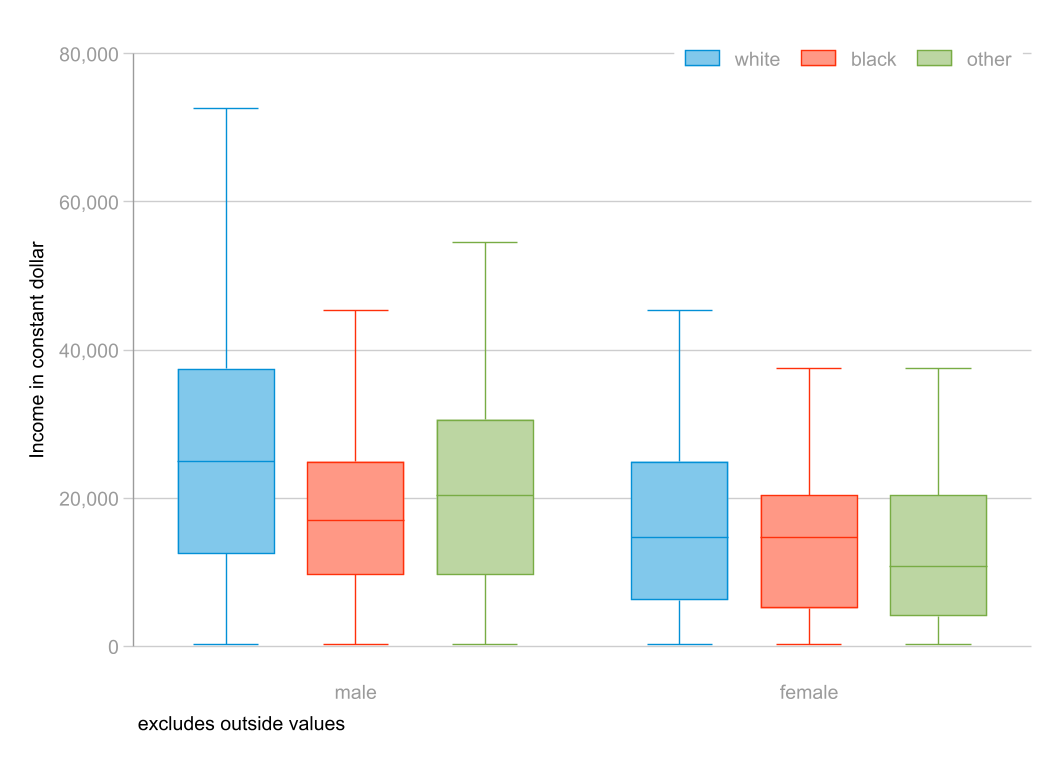

In [13]:
graph box realrinc, over(race) over(sex) asyvars ytitle (Income in constant dollar) ///
  blabel(bar, format(%7.0fc)) legend(rows(1) position(1) ring(0)) scheme(538w) noout

*This shows that the mean (next graph) may not tell the whole story. The boxplot
// below shows that the outlying income values push the mean up for different groups. 

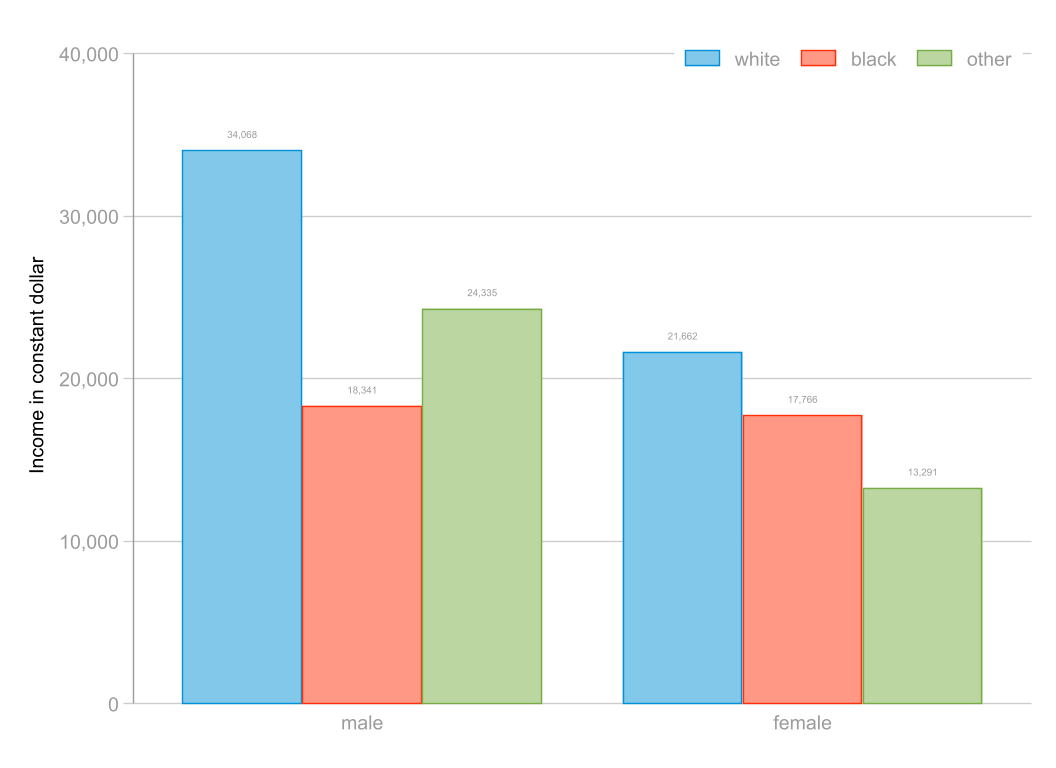

In [12]:
graph bar realrinc, over(race) over(sex) asyvars ytitle (Income in constant dollar) ///
  blabel(bar, format(%7.0fc)) legend(rows(1) position(1) ring(0)) scheme(538w)

### Do the results in the graph support or contradict your hypothesis?

## 3. Interaction estimates with nomominal variables in regression

    A. Interaction estimates add independent variables (IVs) to the model that multiply the interactive variables by each other:
    
$ \hat{Y} = \alpha_{1} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}(x_1\cdot x_2) $

    B. We do this with dummy variables for nominal IVs:
    
$ \hat{Y} = \alpha_{1} + \beta_{1}D_{sex,2} + \beta_{2}D_{race,2} + \beta_{3}D_{race,3} + \beta_{4}D_{sex_2 \cdot race_2} + \beta_{5}D_{sex_2 \cdot race_3}$ 
    
    There are multiple ways to do this in Stata:

In [18]:
quietly {
set line 140
*Method number 1
drop white
gen white= race==1
gen black= race==2
gen female= sex==2
gen whitexfemale = white * female
gen blackxfemale = black * female

*Method number 2
xi i.race*i.sex, noomit
}
*Compare the 2 methods
list race sex white _Irace_1 black _Irace_2 female _Isex_2 whitexfemale ///
_IracXsex_1_2 blackxfemale _IracXsex_2_2 if _n<13


      +---------------------------------------------------------------------------------------------------------------------+
      |  race      sex   white   _Irace_1   black   _Irace_2   female   _Isex_2   whitex~e   _Ira~1_2   blackx~e   _Ira~2_2 |
      |---------------------------------------------------------------------------------------------------------------------|
   1. | white   female       1          1       0          0        1         1          1          1          0          0 |
   2. | black   female       0          0       1          1        1         1          0          0          1          1 |
   3. | other   female       0          0       0          0        1         1          0          0          0          0 |
   4. | white   female       1          1       0          0        1         1          1          1          0          0 |
   5. | other   female       0          0       0          0        1         1          0          0          0     

### There's no need to create new variables before regression

Instead, we can use the following syntax to say we want to interact dummies for the 2 nominal variables:

**--i.var1##i.var2--**

This code will include both the uninteracted dummies and the interacted dummies (minus omitted categories)

Edit the second regression equation below to regress both the uninteracted dummies and the interacted dummies

In [19]:
est clear
eststo: reg realrinc i.race i.sex age age2
eststo: reg realrinc i.race##i.sex age age2


      Source |       SS           df       MS      Number of obs   =     1,358
-------------+----------------------------------   F(5, 1352)      =     33.45
       Model |  1.2496e+11         5  2.4993e+10   Prob > F        =    0.0000
    Residual |  1.0102e+12     1,352   747207356   R-squared       =    0.1101
-------------+----------------------------------   Adj R-squared   =    0.1068
       Total |  1.1352e+12     1,357   836543033   Root MSE        =     27335

------------------------------------------------------------------------------
    realrinc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        race |
      black  |  -7545.588   2032.251    -3.71   0.000    -11532.29   -3558.881
      other  |  -7801.562   2307.963    -3.38   0.001    -12329.14   -3273.985
             |
         sex |
     female  |  -9998.588   1492.018    -6.70   0.000    -12925.51   -7071.665
     

### Then output the 2 models using the esttab code below and lets compare

In [22]:
esttab, stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.0fc)) se(fmt(%6.0fc) par) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(age age2 _cons)  ///
  coeflabels (2.race "Black" 3.race "Other" 2.sex "Female" 2.race#2.sex "Black female" /// 
  3.race#2.sex "Other female")


/* This is hard to interpret (Charlie hesitated to explain in depth). An easier way is to use margins below */


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                b/se/N/r2       b/se/N/r2   
--------------------------------------------
Black              -7,546***      -15,434***
                  (2,032)         (3,170)   
                                            
                                            
Other              -7,802***       -9,434***
                  (2,308)         (3,163)   
                                            
                                            
Female             -9,999***      -12,534***
                  (1,492)         (1,757)   
                                            
                                            
Black female                       13,325***
                                  (4,111)   
                                            
                                            
Other female                        3,291   
         

### It is confusing to interpret the combined coefficients of interaction terms

    A. To estimate the predicted effect on income (DV) of being female (IV) for Black survey respondents, we have to add coefficients:

$ \beta_{2}D_{female} + \beta_{3}D_{black*female}$

= -12,534 + 13,325 = 791 compared to a -12,534 effect of being female for whites

    B. To estimate the effect on income (DV) of being black (IV) among women, we have to do a similar procedure.

    C. The surprising direction of race for women and of sex for black respondents suggests we are doing something wrong, let's log income moving forward

## 4. The **--margins--** / regression adjusted redictions are clearer

edit --margins-- to income across nominal categories if other covariates are held constant at their means:

In [27]:
sum realrinc,detail


                  R's income in constant $
-------------------------------------------------------------
      Percentiles      Smallest
 1%          227            227
 5%         1589            227
10%         2497            227       Obs               1,363
25%       8512.5            227       Sum of wgt.       1,363

50%        17025                      Mean           24994.19
                        Largest       Std. dev.      28881.51
75%        30645       151050.7
90%        54480       151050.7       Variance       8.34e+08
95%        63560       151050.7       Skewness       2.964972
99%     151050.7       151050.7       Kurtosis       13.08687



Variables that uniquely identify margins: race sex


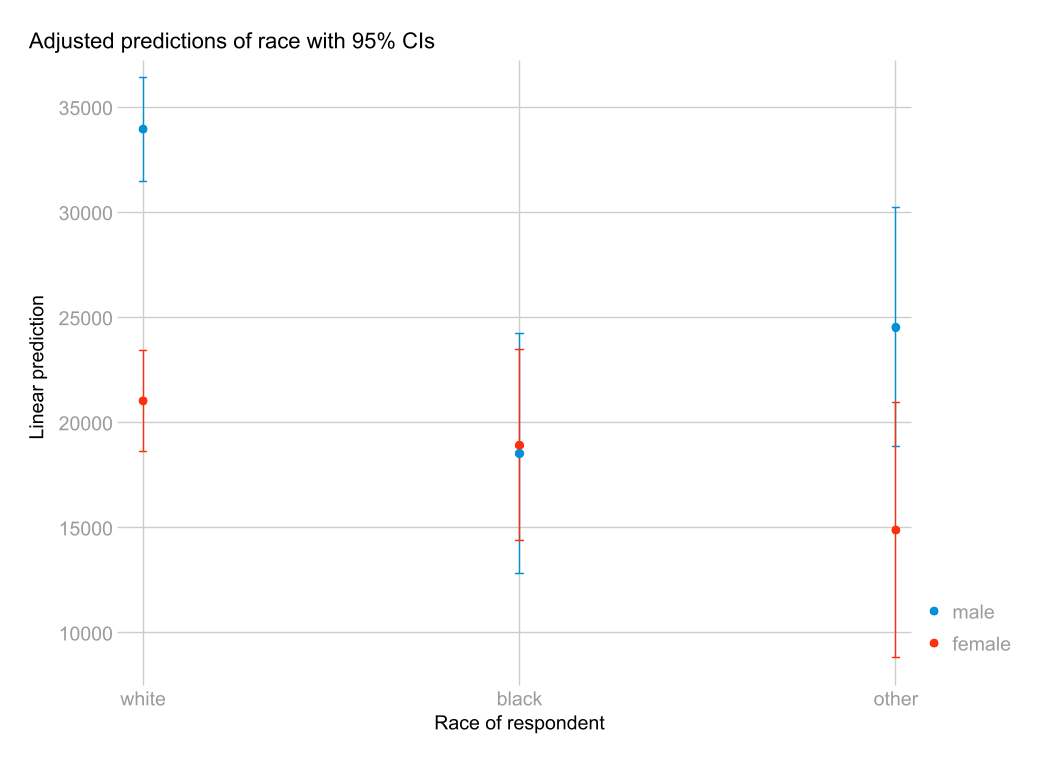

In [24]:
*Margins - what is the predicted range for a given variable if we hold the other variables constant at their means? 
quietly reg realrinc i.race##i.sex age age2 
quietly margins i.race , over(sex     ) atmeans
marginsplot, recast(scatter) scheme(538w)

## Perhaps we should log income?

(985 missing values generated)

Variables that uniquely identify margins: race sex


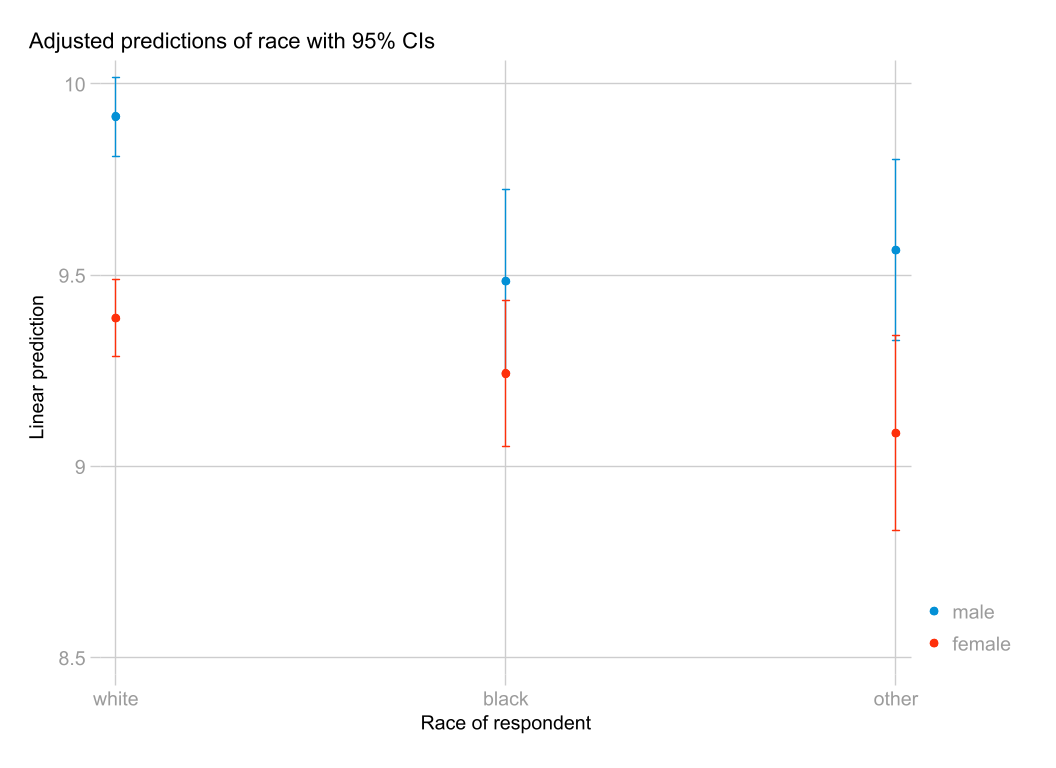

In [28]:
*create a logged income variable
gen realrincln=log(realrinc)

quietly reg realrincln i.race##i.sex age age2 
quietly margins i.race, over(sex) atmeans
marginsplot, recast(scatter) scheme(538w)

# Another way to estimate the same thing with code and presentation more aligned with theories of intersectionality:

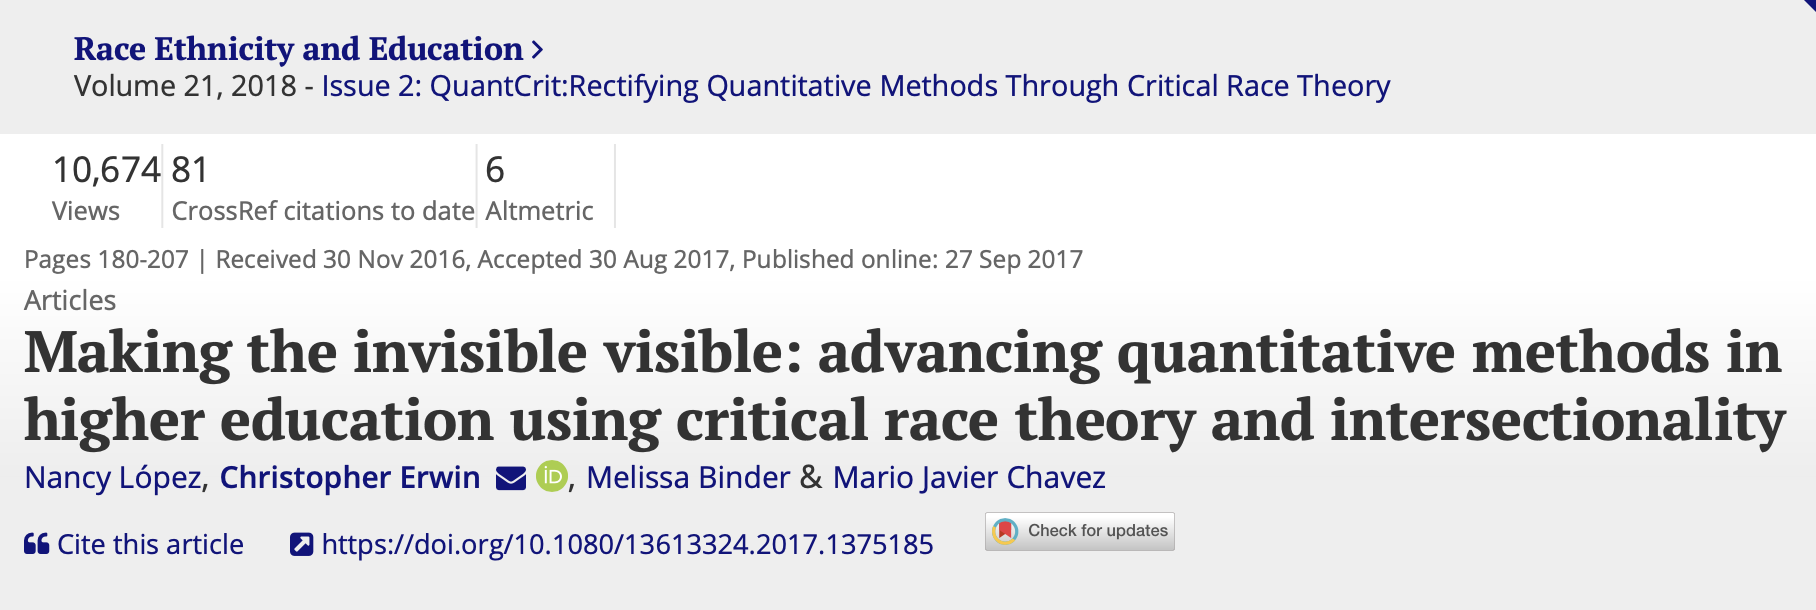

see: https://www.tandfonline.com/doi/full/10.1080/13613324.2017.1375185

In [29]:
gen raceXsex="white male" if race==1 & sex==1
replace raceXsex="white female" if race==1 & sex==2
replace raceXsex="other male" if race==3 & sex==1
replace raceXsex="other female" if race==3 & sex==2
replace raceXsex="Black male" if race==2 & sex==1
replace raceXsex="Black female" if race==2 & sex==2

(1,579 missing values generated)
variable raceXsex was str10 now str12
(924 real changes made)
(126 real changes made)
(144 real changes made)
(157 real changes made)
(228 real changes made)


In [30]:
codebook raceXsex


--------------------------------------------------------------------------------------------------------------------------------------------
raceXsex                                                                                                                         (unlabeled)
--------------------------------------------------------------------------------------------------------------------------------------------

                  Type: String (str12)

         Unique values: 6                         Missing "": 0/2,348

            Tabulation: Freq.  Value
                          228  "Black female"
                          157  "Black male"
                          144  "other female"
                          126  "other male"
                          924  "white female"
                          769  "white male"



In [31]:
encode raceXsex, gen(raceBYsex) 

In [32]:
codebook raceBYsex


--------------------------------------------------------------------------------------------------------------------------------------------
raceBYsex                                                                                                                        (unlabeled)
--------------------------------------------------------------------------------------------------------------------------------------------

                  Type: Numeric (long)
                 Label: raceBYsex

                 Range: [1,6]                         Units: 1
         Unique values: 6                         Missing .: 0/2,348

            Tabulation: Freq.   Numeric  Label
                          228         1  Black female
                          157         2  Black male
                          144         3  other female
                          126         4  other male
                          924         5  white female
                          769         6  white male


In [34]:
labelbook raceBYsex

*Assigns labels values (numeric) to the string values you made earlier, alphabetically 


--------------------------------------------------------------------------------------------------------------------------------------------
Value label raceBYsex 
--------------------------------------------------------------------------------------------------------------------------------------------

      Values                                    Labels
       Range:  [1,6]                     String length:  [10,12]
           N:  6                 Unique at full length:  yes
        Gaps:  no                  Unique at length 12:  yes
  Missing .*:  0                           Null string:  no
                               Leading/trailing blanks:  no
                                    Numeric -> numeric:  no
  Definition
           1   Black female
           2   Black male
           3   other female
           4   other male
           5   white female
           6   white male

   Variables:  raceBYsex




Variables that uniquely identify margins: raceBYsex


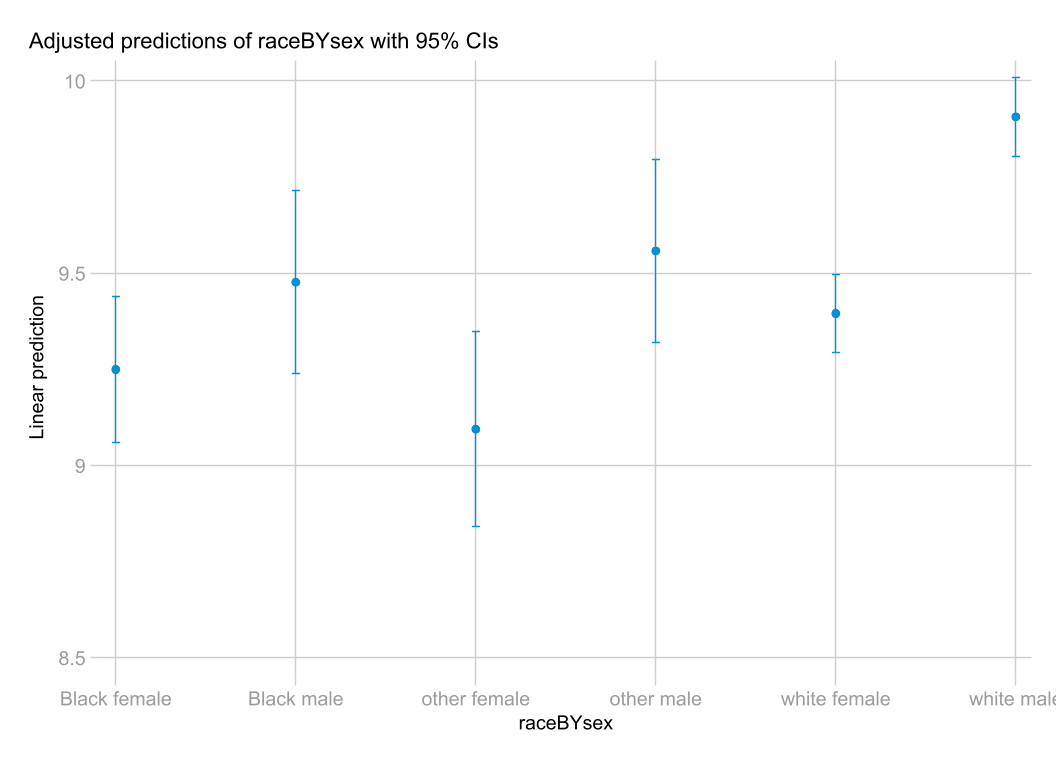

In [36]:
*Now we have a variable with 6 discrete categories that 
// describe the different intersectionalities that we want to examine.
quietly eststo: reg realrincln i.raceBYsex age age2
quietly margins i.raceBYsex, atmeans
marginsplot, recast(scatter) scheme(538w)

## 5. Interactions of interval ratio variables with each other and with nominal variables

    A. Consider the possibility of an interation effect on income (DV) involving education (IV) and race (IV)
    
    B. Do you think the effect on income (DV) of education (IV) will differ across race (IV)? Do you think the effect of race (IV) will differ across education (IV)?
    
    C. Write your predictions as hypotheses
    
H1: The positive relationship between income and education will be less if a person's race is black than if a person's race is any other race 

H1 Aaron: The positive relationship between income and education will be greater if a person's race is black than if a person's race is white
    Theory: because of compound disadvantage, low-education Blacks will be shut out of the labor marker entirely 

### Procedures for interacting interval ratio variables with nominal variables:

A. No dummy variables are involved with interval ratio variables
    
B. So the regression equation for 2 interacted interval ratio variables (IVs) is just:
    
$ \hat{Y} = \alpha_{1} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}(x_1\cdot x_2) $

C. The equation for interacting 1 interval ratio variable with 1 nominal variable is:
    
$ \hat{Y} = \alpha_{1} + \beta_{1}x_1 + \beta_{2}D_{x2,2} + \beta_{3}D_{x2,2}\cdot x_1 $

D. In Stata, we write this using the **--##--** syntax together with c.var1 to tell Stata that an interacted variable is continuous. Complete the following code to do this:

In [37]:
est clear

quietly eststo: reg realrincln i.race educ age age2
quietly eststo: reg realrincln i.race##c.educ age age2

In [38]:
esttab, noconstant stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.2fc)) se(fmt(%6.2fc) par)) ///
  nobase starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(age age2 _cons) ///
  coeflabels (2.race "Black" 3.race "Other" educ "Years of education" ///
  2.race#c.educ "Black * education" 3.race#c.educ "Other * education")  


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
Black               -0.26***        -0.97*  
                   (0.08)          (0.50)   
Other               -0.08            0.07   
                   (0.09)          (0.35)   
Years of e~n         0.13***         0.13***
                   (0.01)          (0.01)   
Black * ed~n                         0.05   
                                   (0.04)   
Other * ed~n                        -0.01   
                                   (0.03)   
--------------------------------------------
R2                   0.21            0.21   
N                   1,357           1,357   
--------------------------------------------


### Back to margins

    A. This time, we want to estimate differences in income between racial groups and educational levels
    
    B. To do this, we use the **--at(var1=(0(i)max)--** syntax to specify the education levels we want estimates for


Variables that uniquely identify margins: educ race


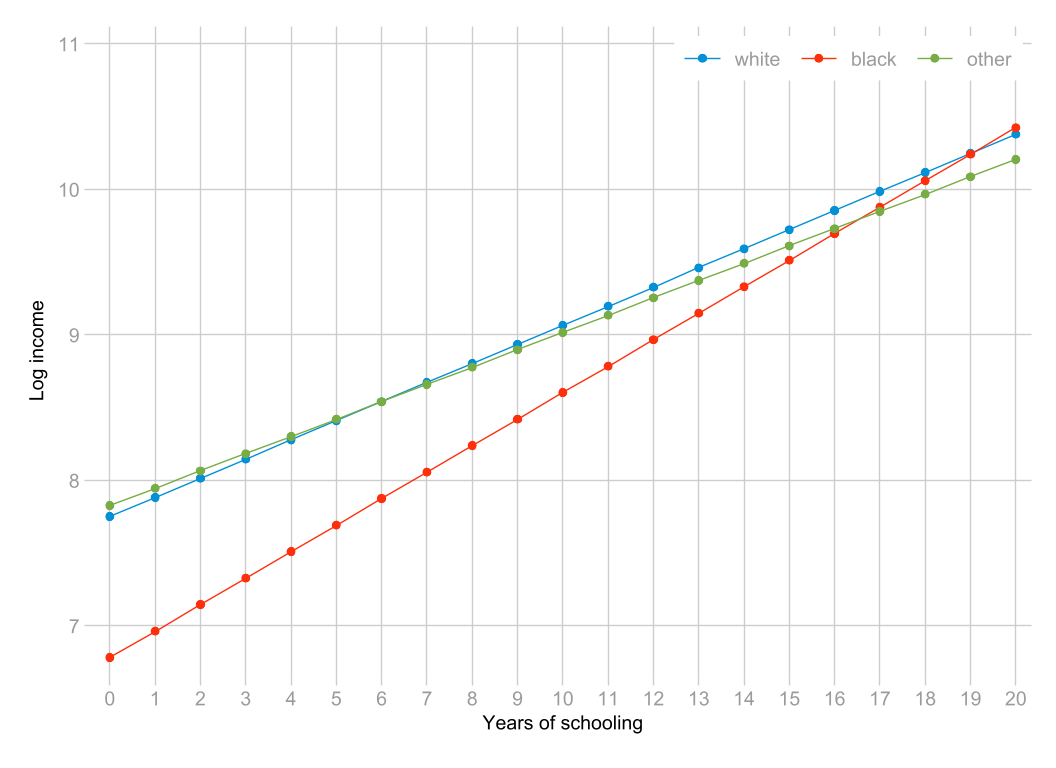

In [39]:
quietly margins race, at(educ=(0(1)20)) atmeans
marginsplot, noci legend(on) title("") subtitle("") xtitle("Years of schooling") ///
  ytitle("Log income") legend(rows(1) position(1) ring(0)) scheme(538w)

### How would you interpret the above graph?

## 6. Two more applied Example: 

A. Debt cancellation for interaction categories by household asset decile and race: https://github.com/HigherEdData/Student-Debt-Cancellation-IS-Progressive/blob/main/f6_cancelbyassetsrace.ipynb
    
B. Debt cancellation for interaction categories by net worth decile and race: https://github.com/HigherEdData/Student-Debt-Cancellation-IS-Progressive/blob/main/f7_cancelbynetworthrace.ipynb